<a href="https://colab.research.google.com/github/moshakk/resume_app/blob/main/mytrainigv8yyy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May  4 13:49:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 24.2 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

In [5]:
# Load a model

model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)

# Train the model
model.train(data='/content/drive/MyDrive/EG_CURN_DATASET/data.yaml', epochs=500, imgsz=640)

100%|██████████| 21.5M/21.5M [00:01<00:00, 22.4MB/s]
Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/EG_CURN_DATASET/data.yaml, epochs=500, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [25]:
from PIL import Image


In [26]:
from IPython.display import Image


In [ ]:
model = YOLO("/content/runs/detect/train/weights/large_epoch.pt")
image = Image.open("WhatsApp Image 2023-04-19 at 7.17.26 AM.jpeg")

results = model.predict(image)


0: 640x480 1 10 pound, 2 100 poundss, 2 20 poundss, 1 50 pounds, 7.4ms
Speed: 0.5ms preprocess, 7.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [20]:
model = YOLO("/content/runs/detect/train/weights/large_epoch.pt")

# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/large_epoch.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 17, 8400) (21.5 MB)
requirements: YOLOv8 requirements "onnx" "onnx2tf>=1.7.7" "sng4onnx>=1.0.1" "onnxsim>=0.4.17" "onnx_graphsurgeon>=0.3.26" "tflite_support" "onnxruntime-gpu" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 127.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.7/344.7 kB 353.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 336.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 196.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 

============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 8.3s, saved as /content/runs/detect/train/weights/large_epoch.onnx (42.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i /content/runs/detect/train/weights/large_epoch.onnx -o /content/runs/detect/train/weights/large_epoch_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 110.4s, saved as /content/runs/detect/train/weights/large_epoch_saved_model (106.7 MB)

TensorFlow Lite: starting export with tensorflow 2.12.0...
TensorFlow Lite: export success ✅ 0.0s, saved as /content/runs/detect/train/weights/large_epoch_saved_model/large_epoch_float32.tflite (42.6 MB)

Export complete (111.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/large_epoch_saved_model/large_epoch_float32.tflite imgsz=640 
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/large_epoch_saved_model/large_epoch_float32.tflite imgsz=640 data=/content/drive/MyDrive

'/content/runs/detect/train/weights/large_epoch_saved_model/large_epoch_float32.tflite'

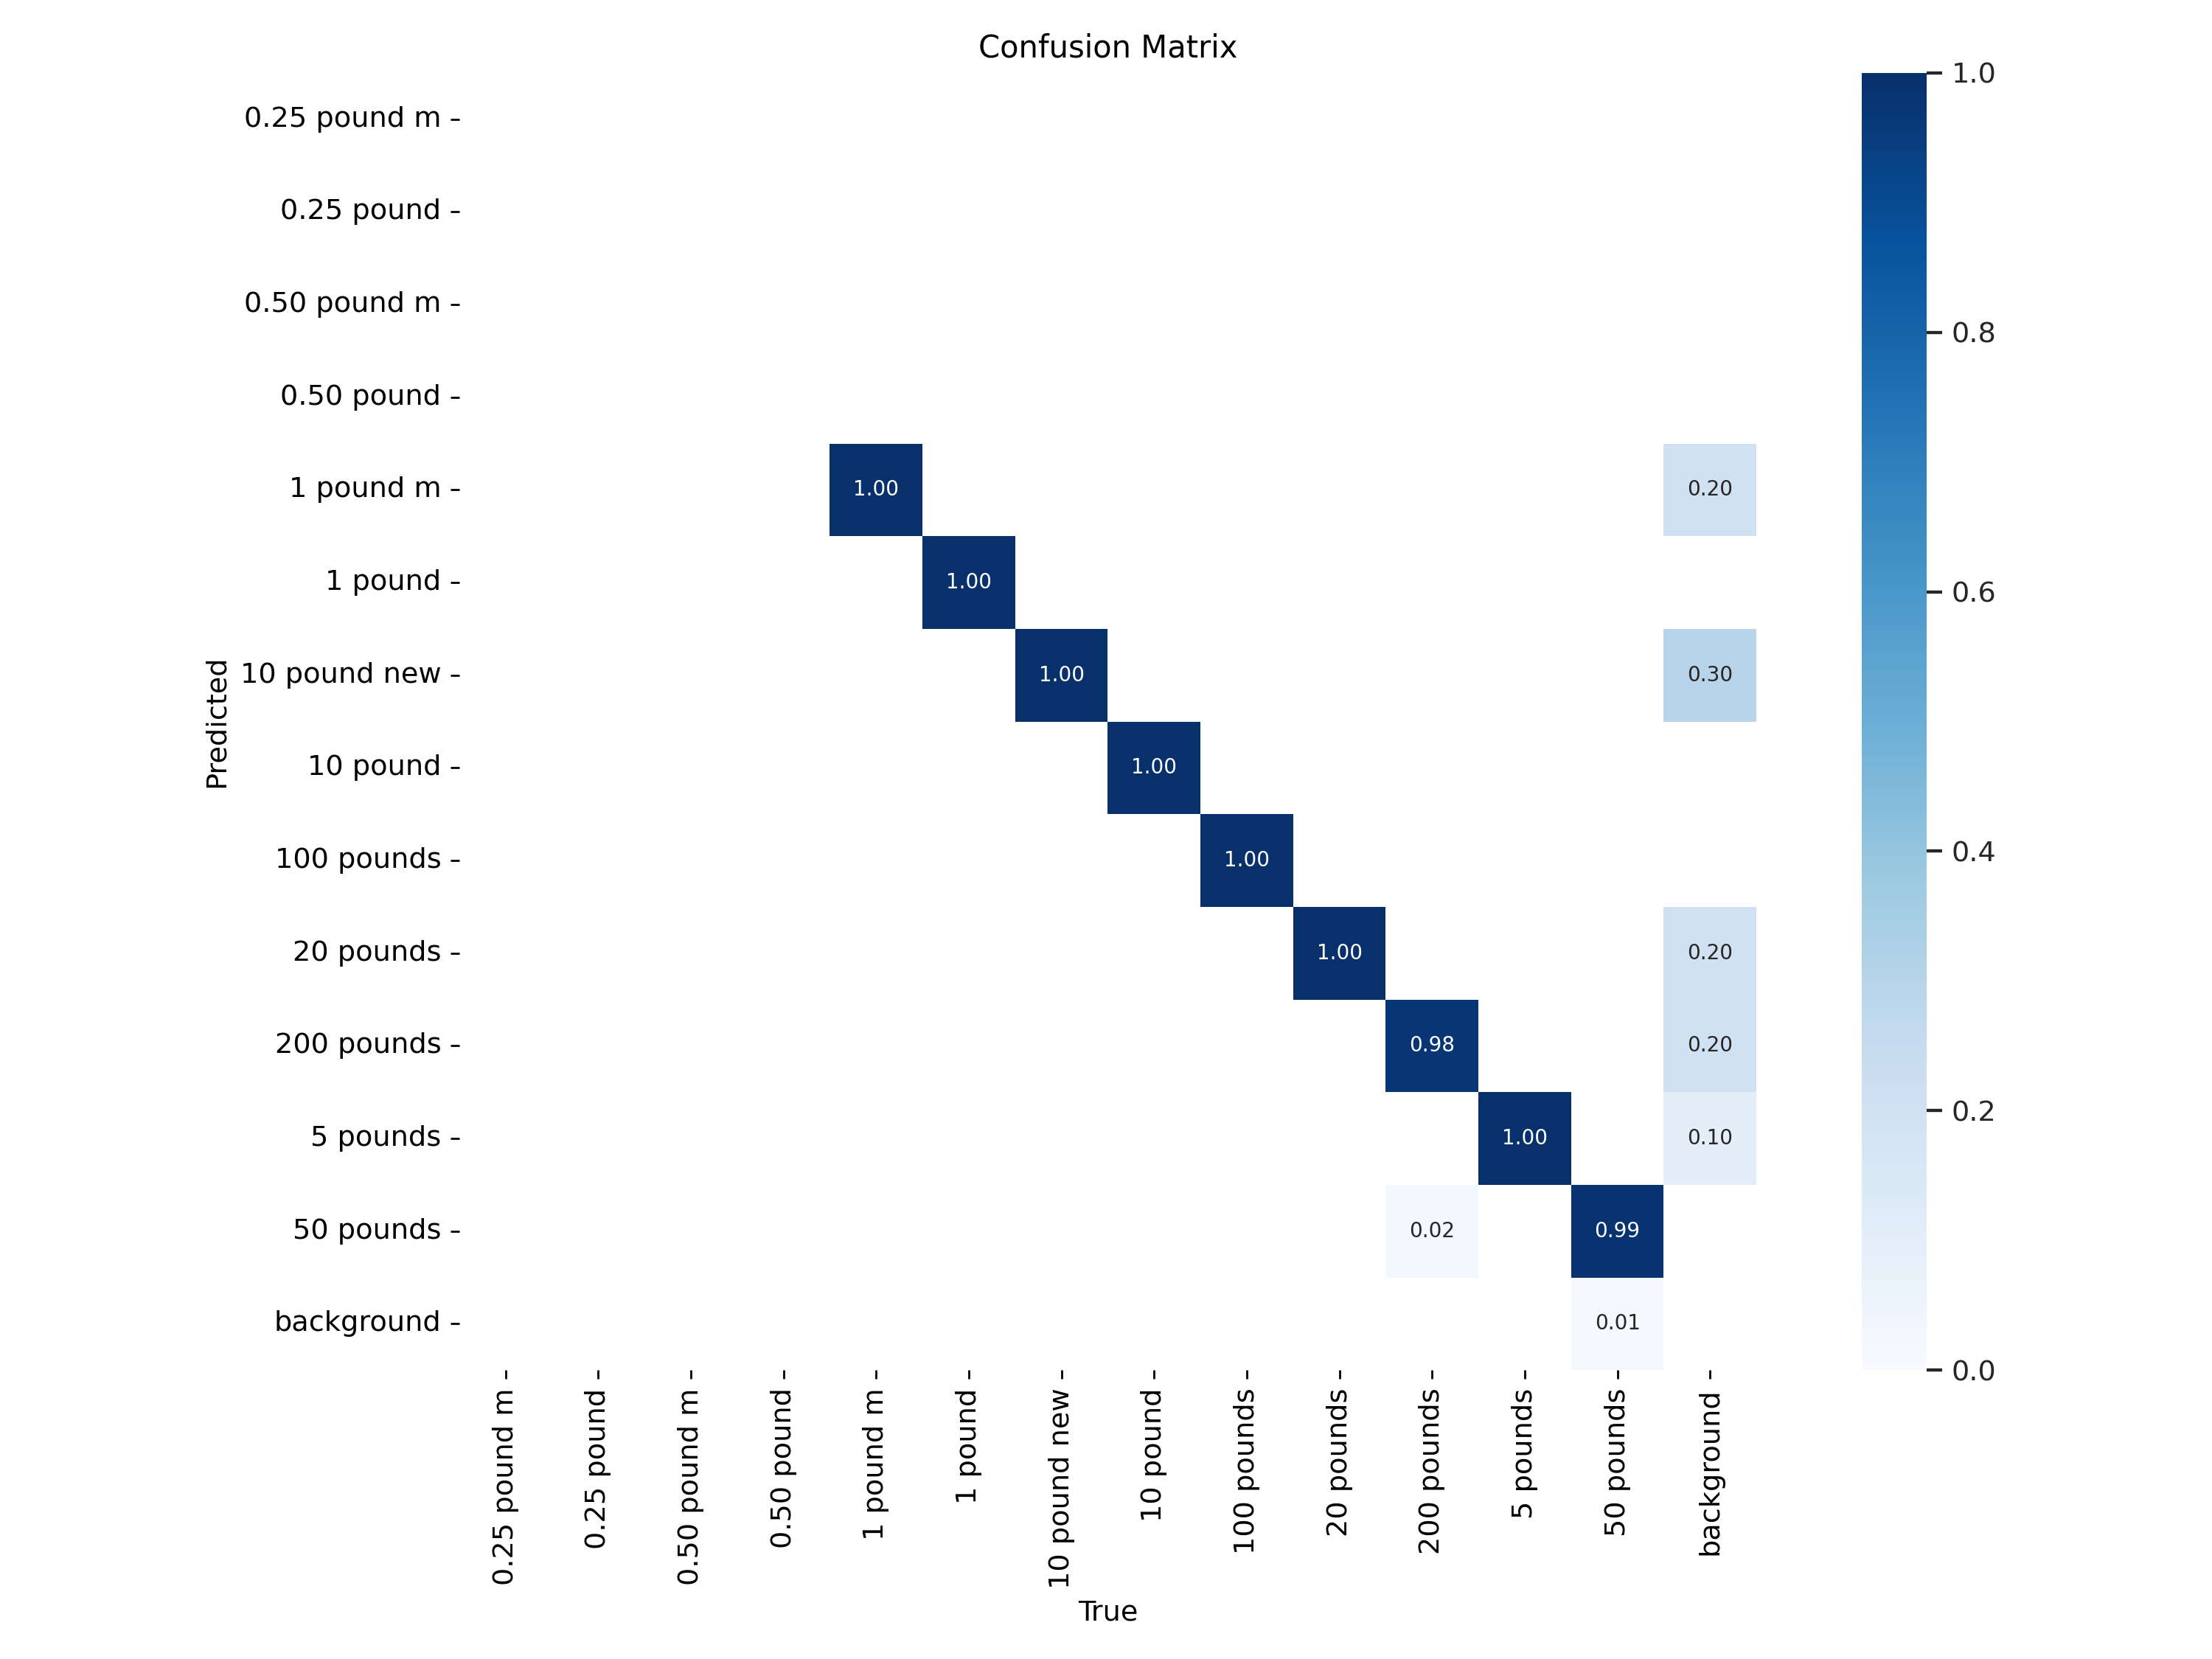

In [30]:
Image(filename = '/content/runs/detect/train/confusion_matrix.png',width=1000)


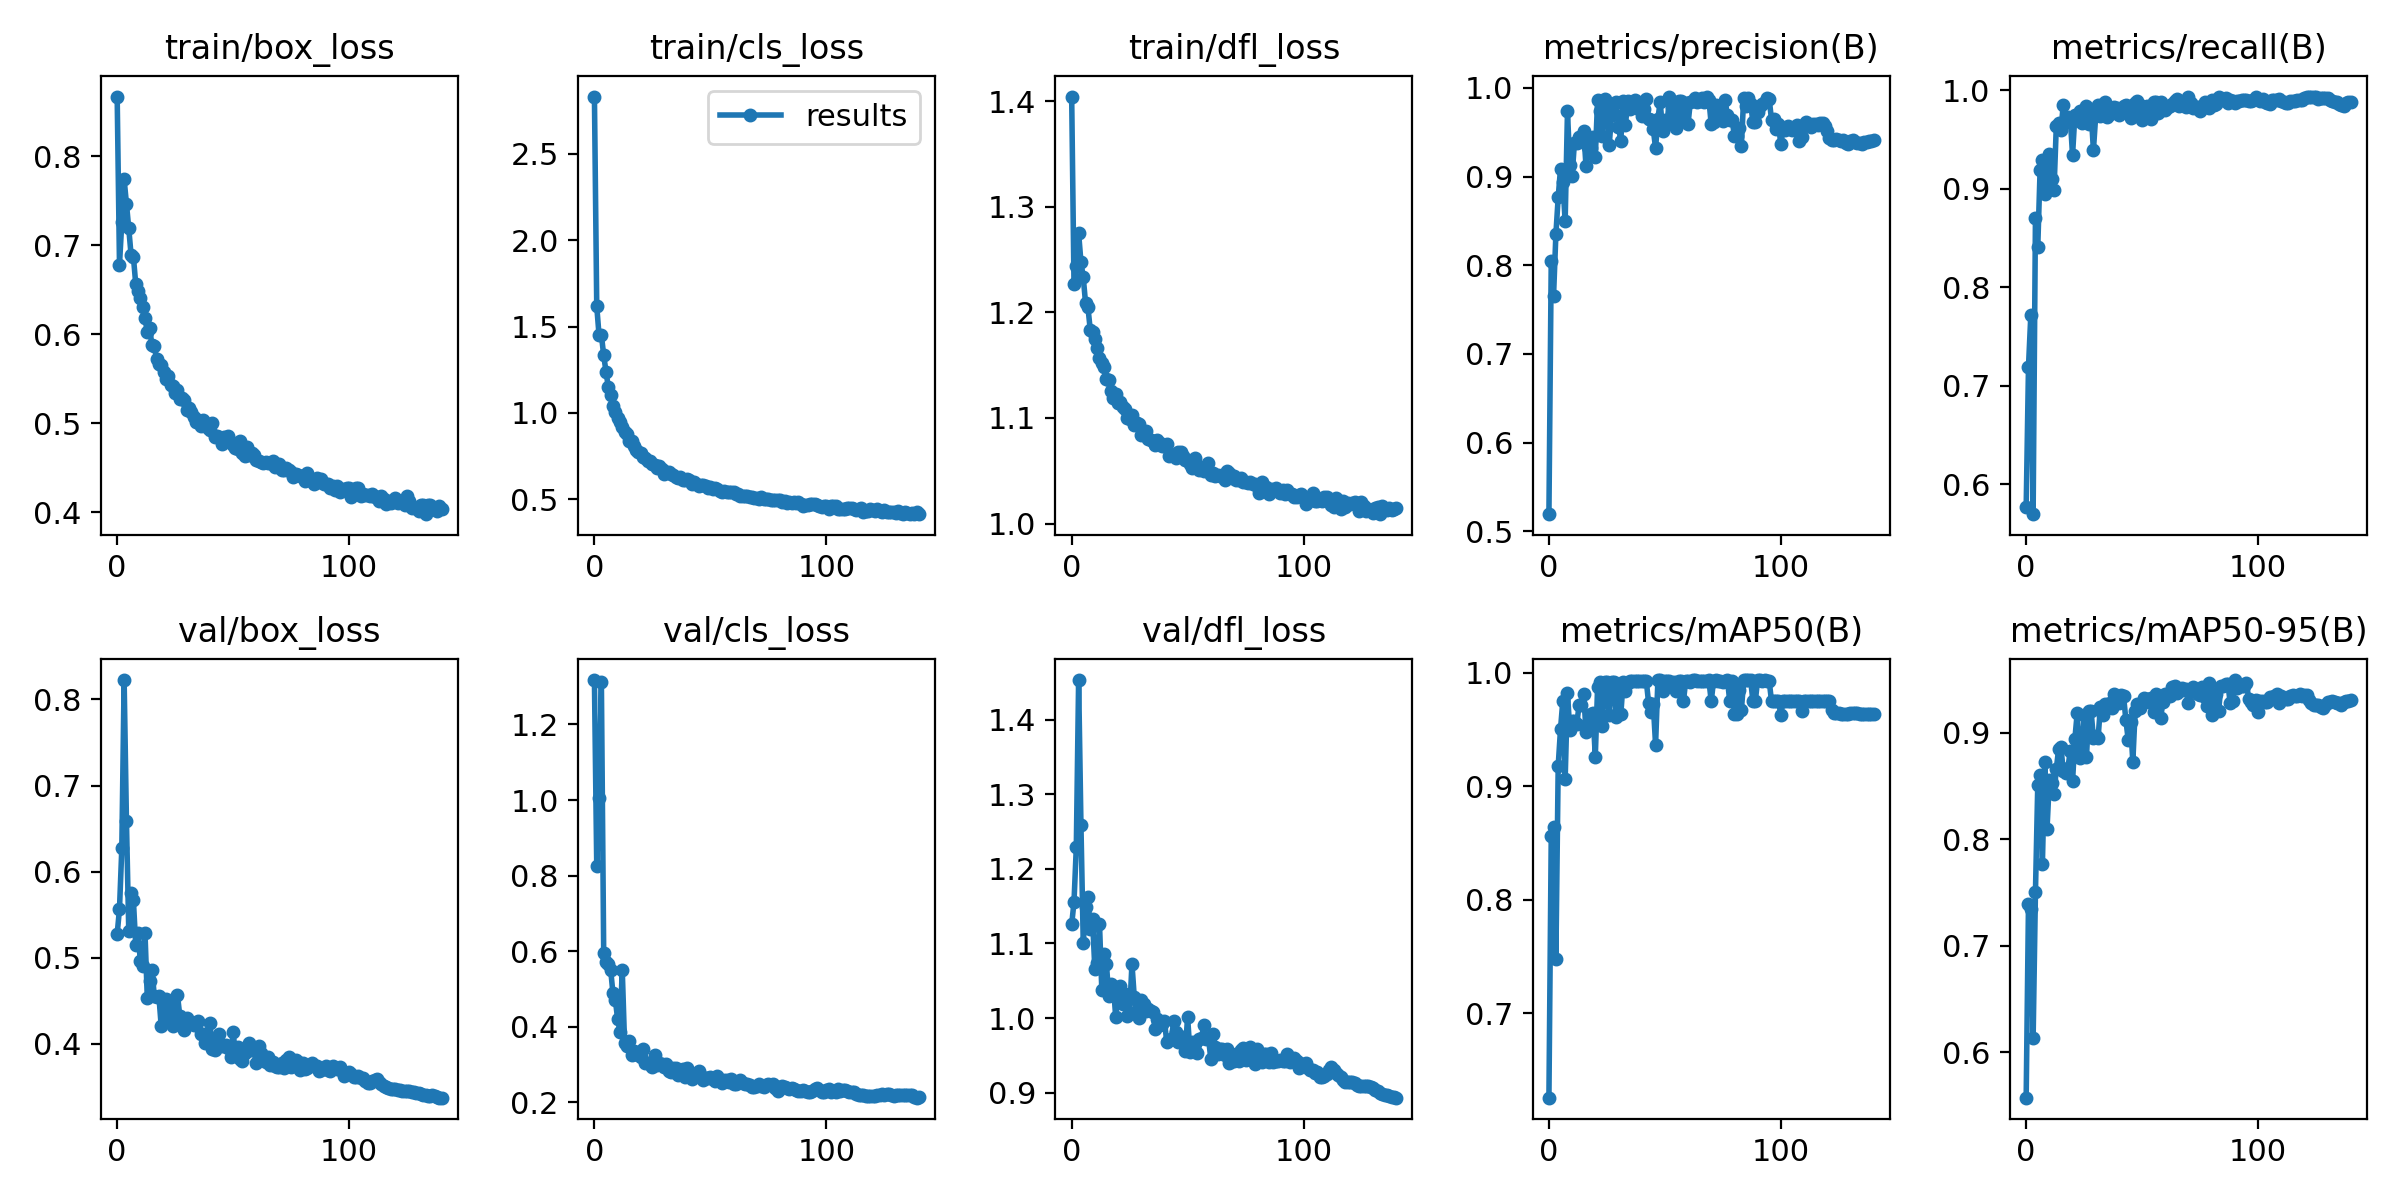

In [31]:
Image(filename = r'/content/runs/detect/train/results.png', width = 600)

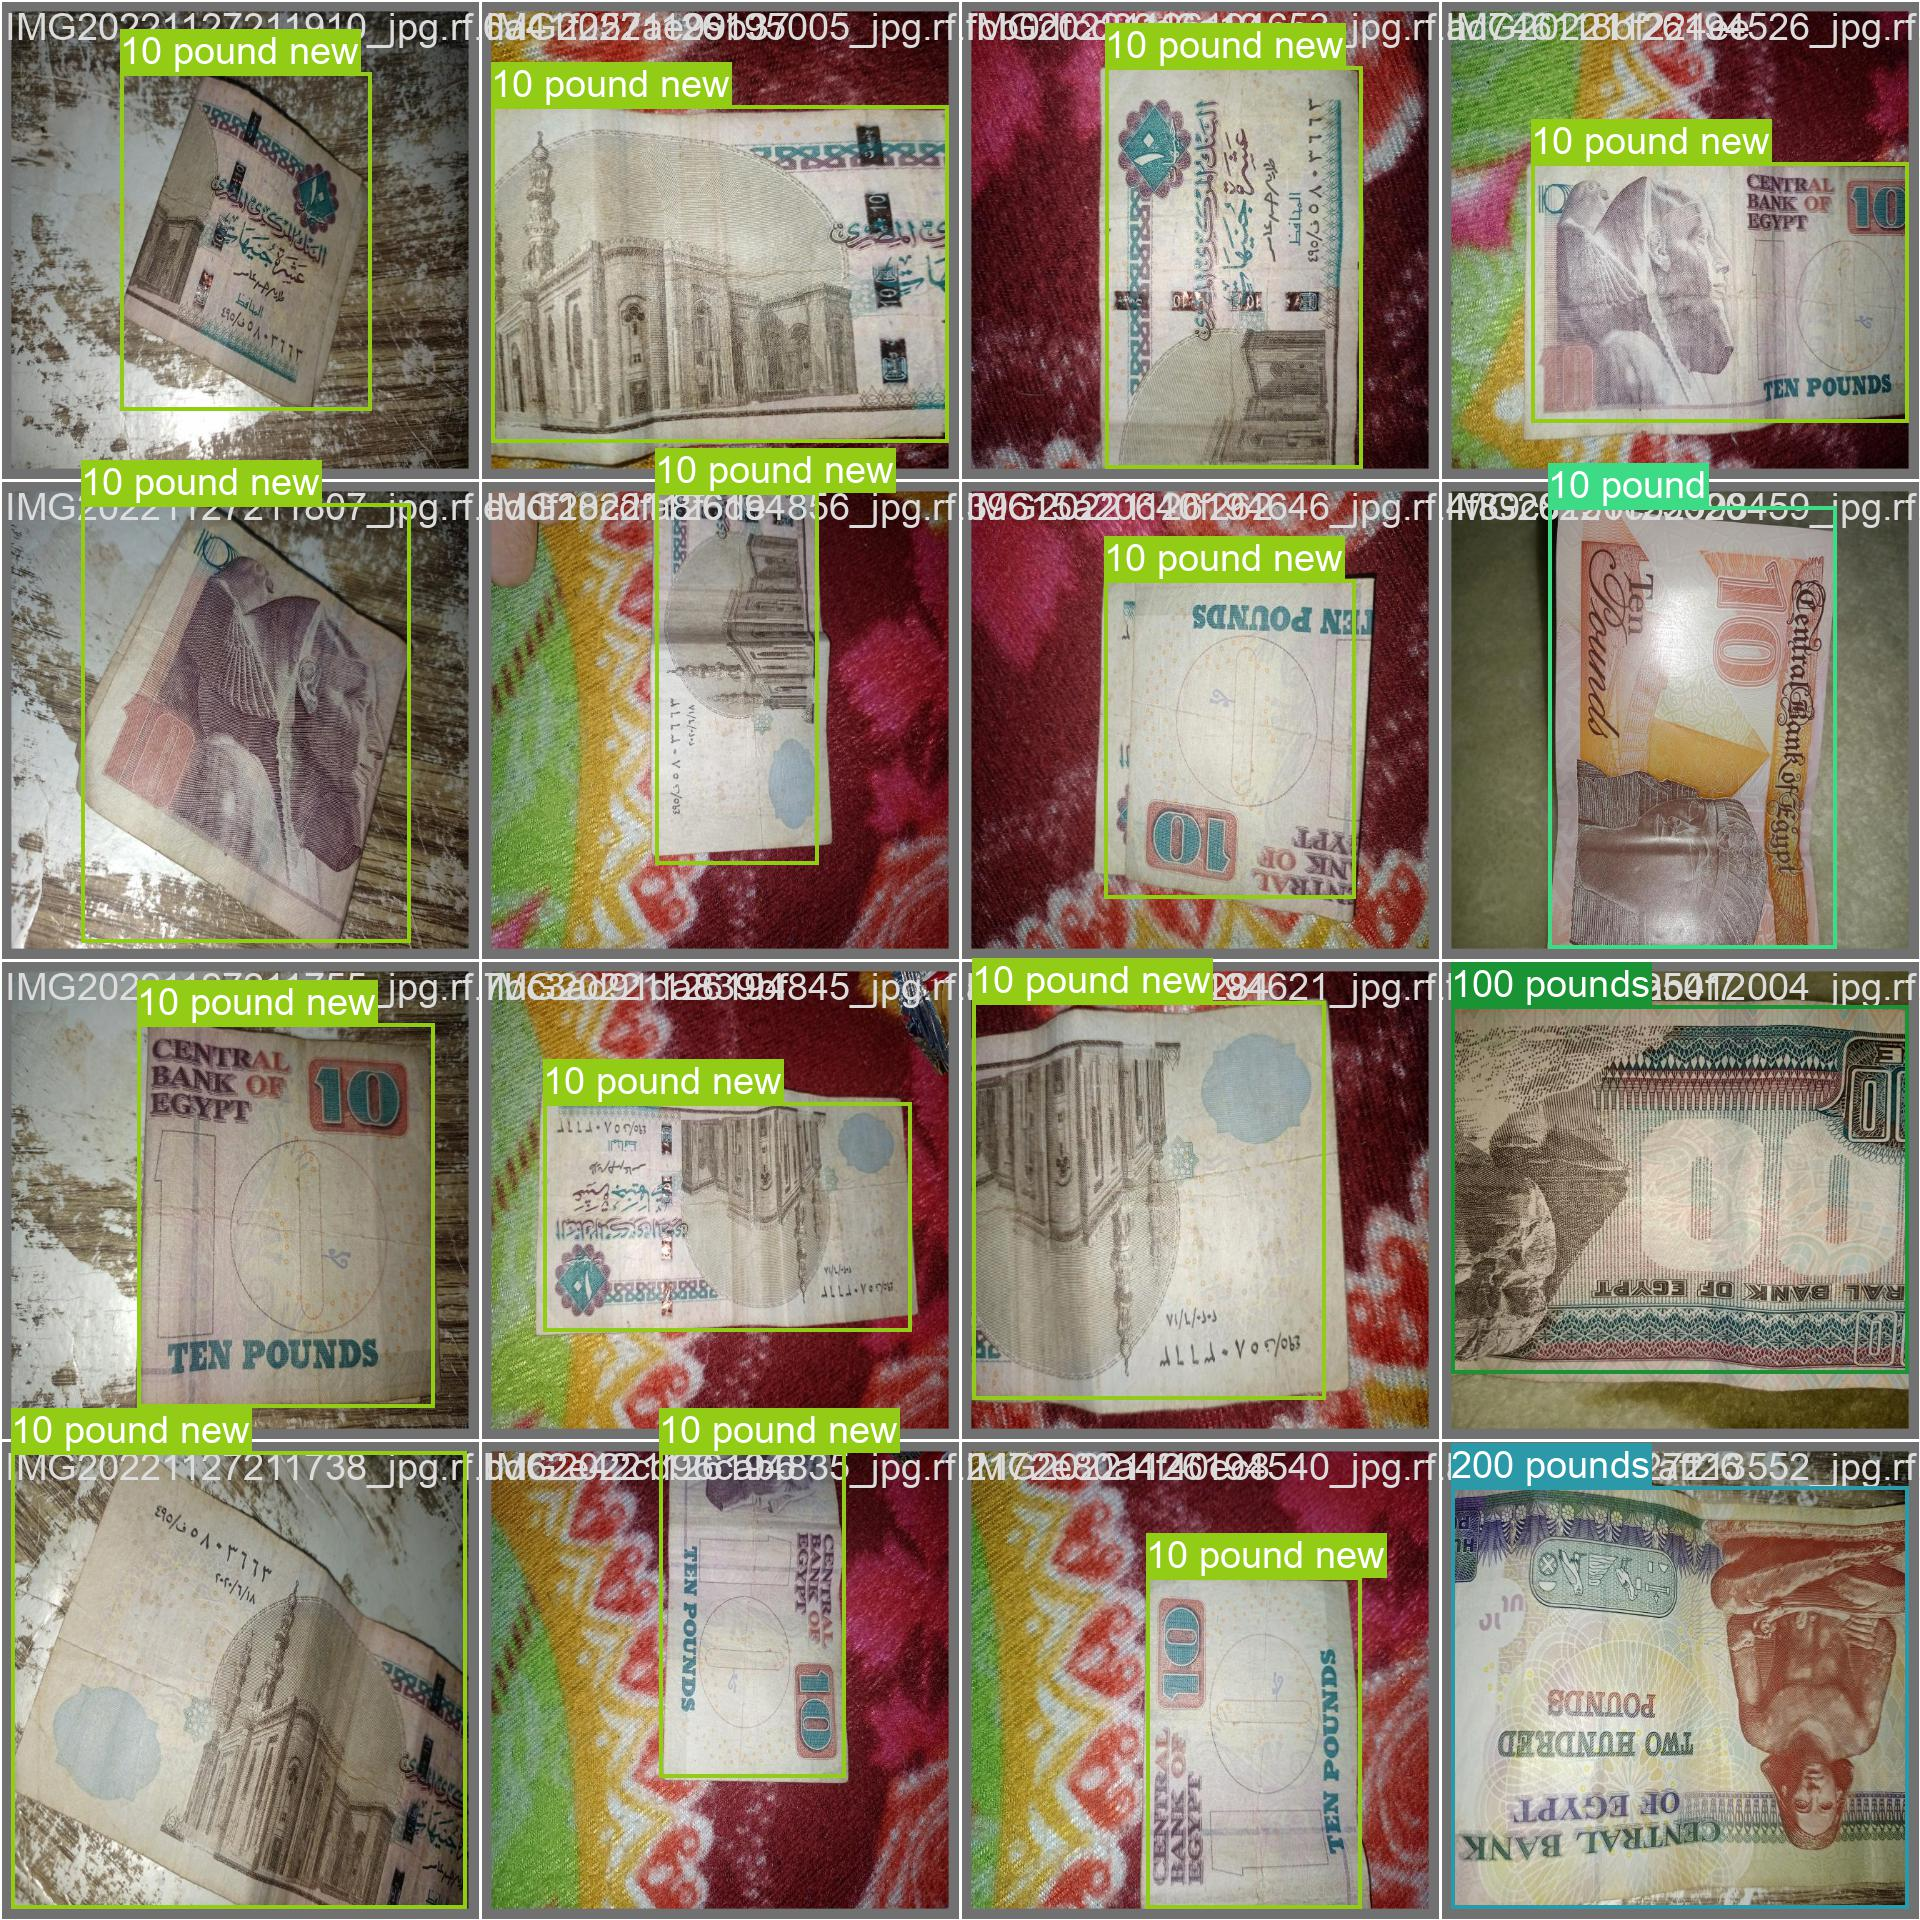

In [32]:
Image(filename = r'/content/runs/detect/train/val_batch1_labels.jpg', width =600)


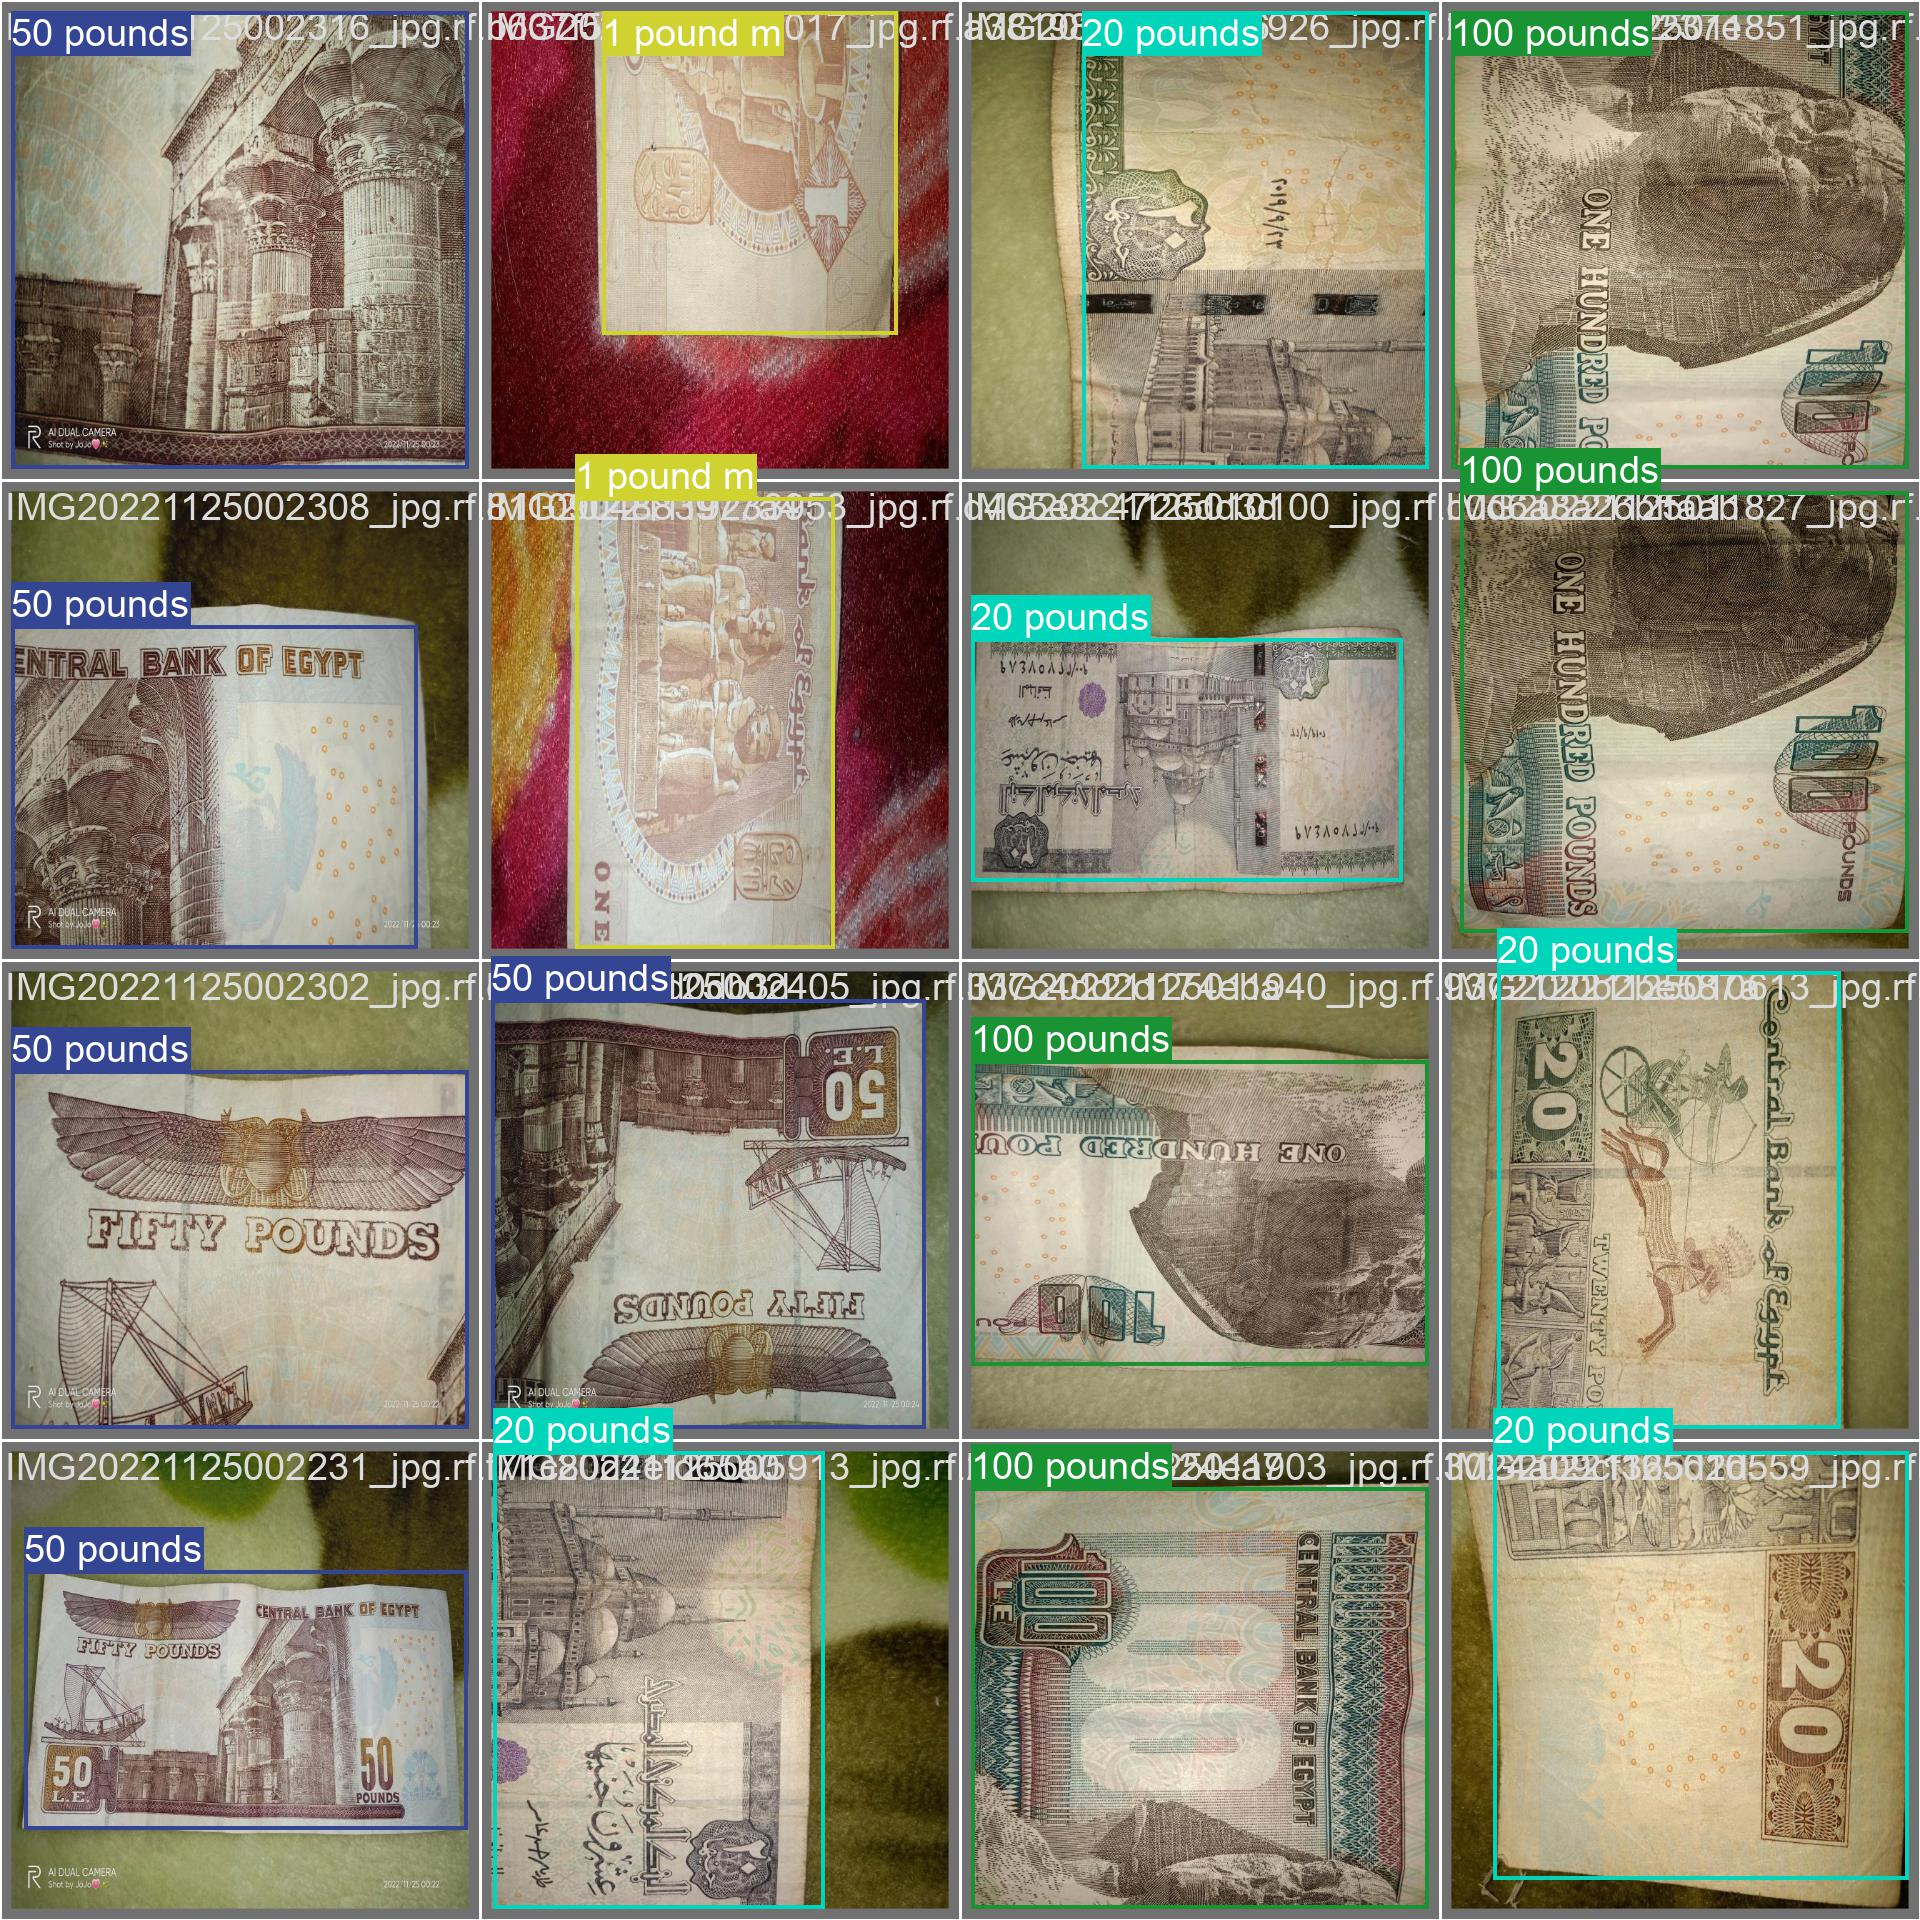

In [33]:
Image(filename = r'/content/runs/detect/train/val_batch2_labels.jpg', width =600)


In [18]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')


'en_US.utf8'

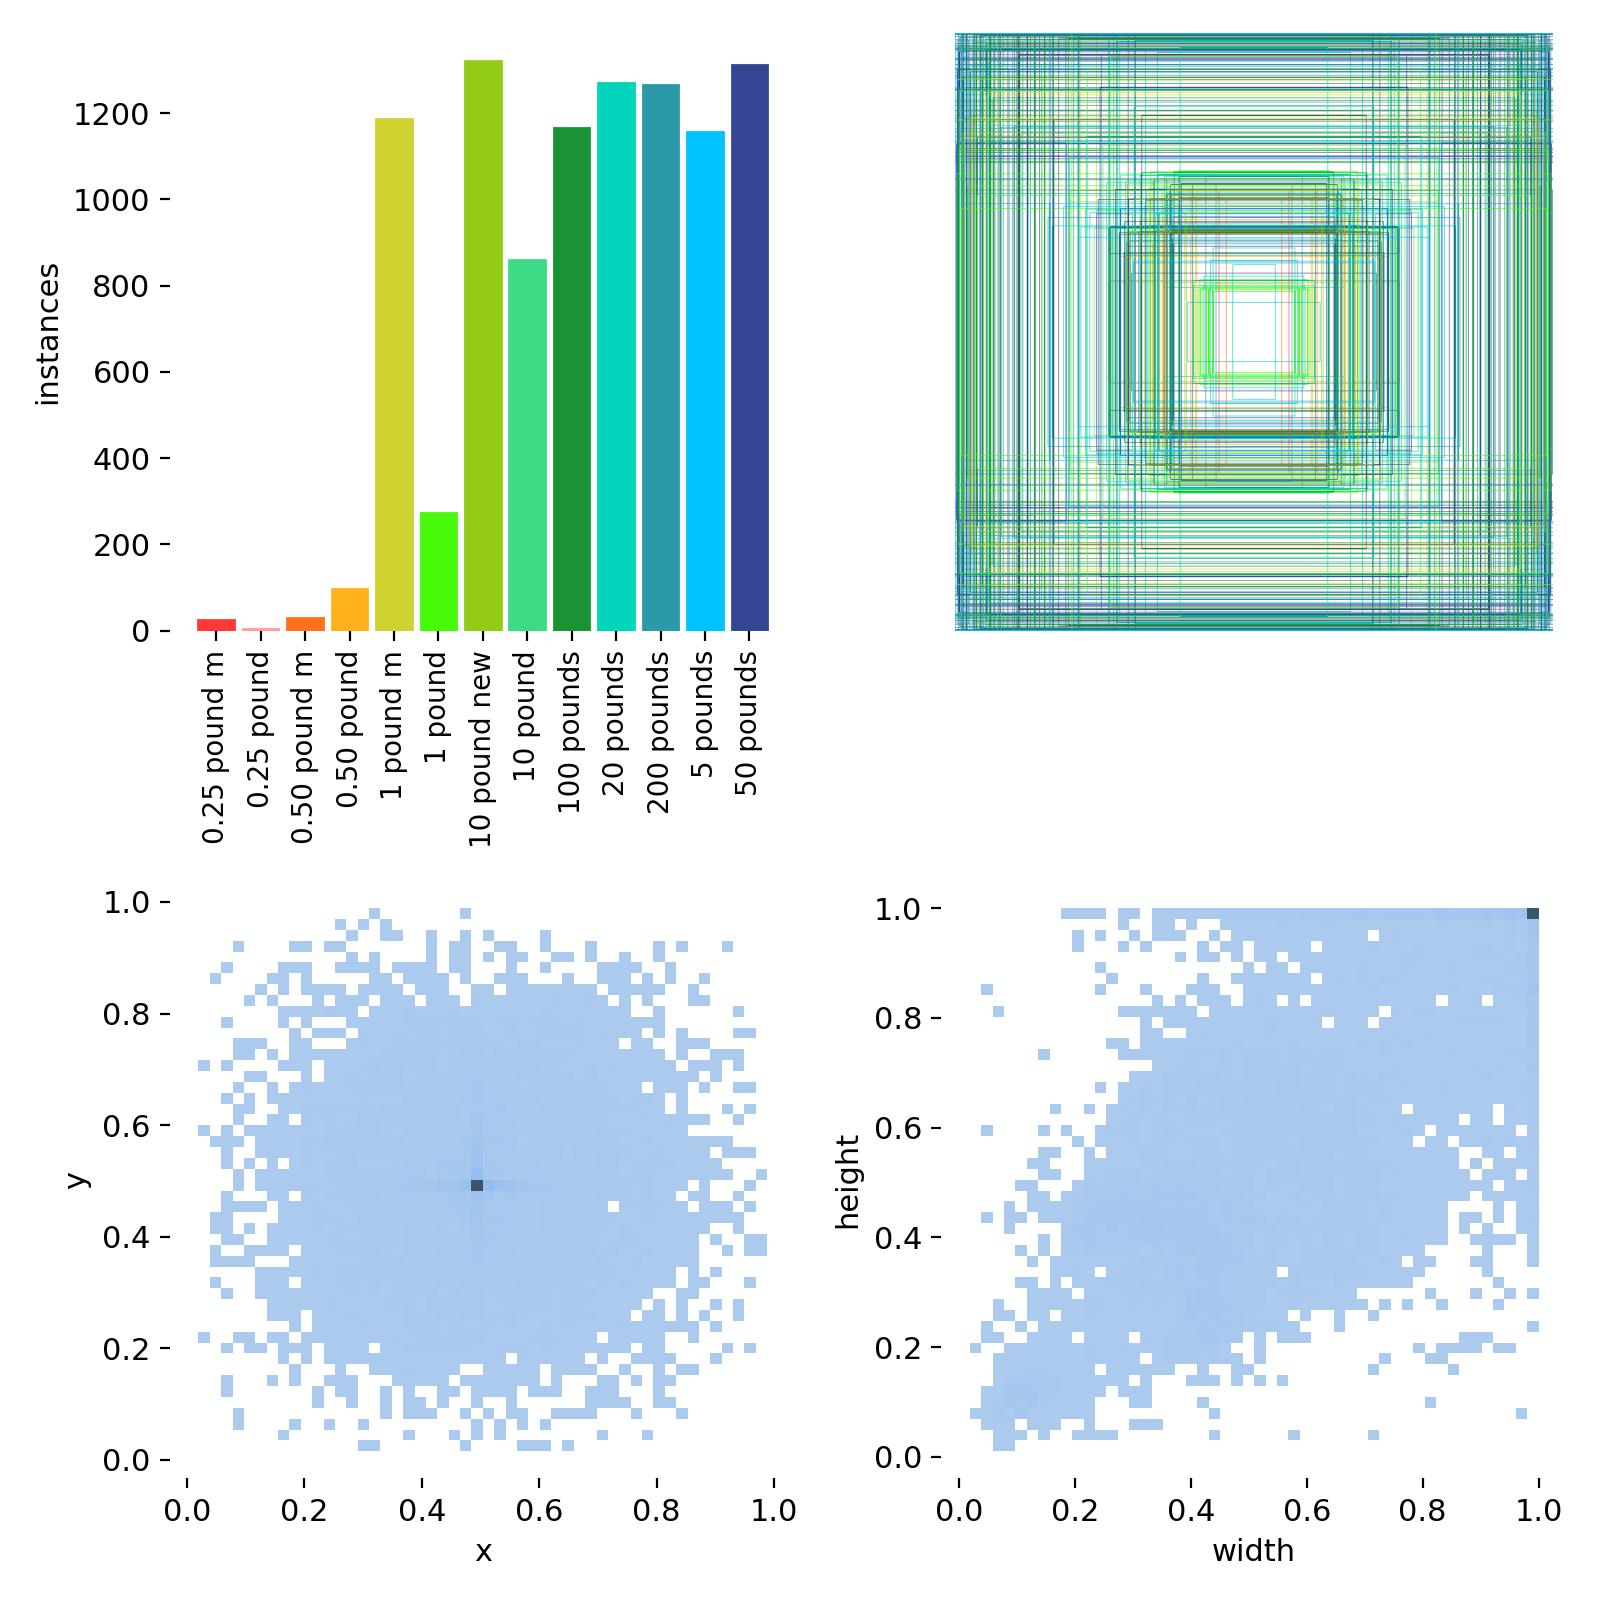

In [34]:
Image(filename = r'/content/runs/detect/train/labels.jpg', width =600)
